In [2]:
#spotifyAPI
#!pip install spotipy
#!pip install pprintpp

In [3]:
import json
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.preprocessing import MinMaxScaler

# Stuff I imported
from pprintpp import pprint as pp
import json
from time import time, sleep
from random import randint

In [4]:
client_id = '5cb8537300574d549c5983a2417f8392' #insert your client id
client_secret = 'af60768b38894f4c97aa0bae655dc7d9' # insert your client secret id here

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [5]:
#Getting JAZZ playlist
playlist_id='2289PygF7mVcomsMdApKpM' #insert your playlist id
results = sp.playlist(playlist_id)

In [6]:
#JAZZ
#
# To get data from all the pages

track_id = []
playlist_info = []
results = sp.playlist(playlist_id)

# Will return a dictionary containing info of 100 tracks
tracks = results['tracks']

# Append the initial 100 tracks to the list
playlist_info.append(tracks)

song_meta={'id':[],'album':[], 'name':[], 'artist':[],'explicit':[],'popularity':[]}

i = 0
while (tracks['next']):
    # Gives a dictionary of the next 100 tracks
    tracks = sp.next(tracks)
    #print(tracks)

    playlist_info.append(tracks)
    
    # Use sleep in your project. I have given a break at i=7 because of time constraints.
    sleep(randint(8,15))

    i+=1
    print(i)

# Use JSON to store the metadata
playlist_details = json.dumps(playlist_info, indent=4)
with open("playlist_info.json", "w") as write_file:
    write_file.write(playlist_details)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


In [7]:
#JAZZ

# I recommend that you use JSON for storing and referencing while scraping. It will save you (a) A lot of time (b) unwanted requests to the API 
# (and hence the server) - which will reduce the chances of your request being denied.
#
# When I tried using your code in the following cell, the server rejected requests as they were many in number. You are getting the metadata 
# in the previous cell, why not use it?
#
# Doing this is optional and you may choose to not follow it.
# But if you do, please keep in mind that the way you are accessing audio_features later in the code will change.
# Also note that the way you are merging the two dataframes towards the end might also change (check for duplicates).

song_meta={'id':[],'album':[], 'name':[], 
           'artist':[],'explicit':[],'popularity':[]}

with open("playlist_info.json", "r") as read_file:
    playlist_info = json.loads(read_file.read())

for playlist in playlist_info:
    for items in playlist['items']:
        # Album Name
        song_meta['album'].append(items['track']['album']['name'])

        # Song ID
        song_meta['id'].append(items['track']['id'])
        
        # Song Name
        song_meta['name'].append(items['track']['name'])

        # Artists Name
        artists_list = []
        artists = items['track']['artists']
        for artist in artists:
            artists_list.append(artist['name'])
        song_meta['artist'].append(artists_list)

        # Explicit
        song_meta['explicit'].append(items['track']['explicit'])

        # Popularity
        song_meta['popularity'].append(items['track']['popularity'])

#pp(song_meta)
print("Album Name :", len(song_meta['album']))
print("Song ID :", len(song_meta['id']))
print("Song Name :", len(song_meta['name']))
print("Artists Name :", len(song_meta['artist']))
print("Explicit :", len(song_meta['explicit']))
print("Popularity :", len(song_meta['popularity']))
song_meta_df=pd.DataFrame.from_dict(song_meta)
song_meta_df.info()

Album Name : 2731
Song ID : 2731
Song Name : 2731
Artists Name : 2731
Explicit : 2731
Popularity : 2731
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2731 entries, 0 to 2730
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          2731 non-null   object
 1   album       2731 non-null   object
 2   name        2731 non-null   object
 3   artist      2731 non-null   object
 4   explicit    2731 non-null   bool  
 5   popularity  2731 non-null   int64 
dtypes: bool(1), int64(1), object(4)
memory usage: 109.5+ KB


In [8]:
#song_meta_df=pd.DataFrame.from_dict(song_meta)
song_meta_df

,id,album,name,artist,explicit,popularity
0,7xre34OXHr74FJ5TqK9jyu,JazzHop to Chill To,Hip Hop Weekdays,"[Chill Beats Music, Zmeyev]",False,54
1,0Z4X99CifvWwwyezhBjeHX,Empty Building,Whut!,[Ours Samplus],False,51
2,6uuIxdW9KpOg8RUHwqIRp1,Birds,Golden Pheasant,"[Cloudchord, Oatmello]",False,53
3,1eVWMwRdu2oa0wz1GC6pH7,Empty Building,Leave It,[Ours Samplus],False,52
4,56OB1wXrkYTAfPOTZUMA9M,Will You Fly With Me,Will You Fly With Me,[Downtown Owl],False,37
...,...,...,...,...,...,...
2726,0n8ob8S72lvznoVfiwz4qL,Purpose (Deluxe),Where Are Ü Now,"[Skrillex, Diplo, Justin Bieber]",False,0
2727,7C7yqFTM0ncyJ04GIKrxdV,Halcyon,Anything Could Happen,[Ellie Goulding],False,56
2728,3KliPMvk1EvFZu9cvkj8p1,Britney Jean (Deluxe Version),Work Bitch,[Britney Spears],True,72
2729,5N5k9nd479b1xpDZ4usjrg,Promises (with Sam Smith),Promises (with Sam Smith),"[Calvin Harris, Sam Smith, Jessie Reyez]",False,78


In [9]:
#JAZZ

# check the song feature
features = []
i = 0
for id in song_meta['id']:
    audio_features = sp.audio_features(id)[0]

    if audio_features!=None:
        features.append(audio_features)
    #print(features)
    # Run it entirely for your project! Do not break.
    #if (i==500):
        #break
    #i+=1

#pp(features)
features_df=pd.DataFrame(features)

In [10]:
features_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.817,0.431,9,-11.858,1,0.1530,0.6210,0.775000,0.0996,0.4280,90.004,audio_features,7xre34OXHr74FJ5TqK9jyu,spotify:track:7xre34OXHr74FJ5TqK9jyu,https://api.spotify.com/v1/tracks/7xre34OXHr74...,https://api.spotify.com/v1/audio-analysis/7xre...,129042,4
1,0.423,0.539,7,-9.552,0,0.0315,0.2730,0.736000,0.0852,0.3010,129.426,audio_features,0Z4X99CifvWwwyezhBjeHX,spotify:track:0Z4X99CifvWwwyezhBjeHX,https://api.spotify.com/v1/tracks/0Z4X99CifvWw...,https://api.spotify.com/v1/audio-analysis/0Z4X...,120209,3
2,0.659,0.343,4,-10.971,1,0.0538,0.9040,0.821000,0.1020,0.0728,66.984,audio_features,6uuIxdW9KpOg8RUHwqIRp1,spotify:track:6uuIxdW9KpOg8RUHwqIRp1,https://api.spotify.com/v1/tracks/6uuIxdW9KpOg...,https://api.spotify.com/v1/audio-analysis/6uuI...,171940,4
3,0.716,0.396,1,-9.035,0,0.1420,0.7050,0.938000,0.1350,0.1890,76.996,audio_features,1eVWMwRdu2oa0wz1GC6pH7,spotify:track:1eVWMwRdu2oa0wz1GC6pH7,https://api.spotify.com/v1/tracks/1eVWMwRdu2oa...,https://api.spotify.com/v1/audio-analysis/1eVW...,204376,3
4,0.760,0.387,3,-9.362,0,0.1240,0.1960,0.736000,0.1060,0.4320,165.821,audio_features,56OB1wXrkYTAfPOTZUMA9M,spotify:track:56OB1wXrkYTAfPOTZUMA9M,https://api.spotify.com/v1/tracks/56OB1wXrkYTA...,https://api.spotify.com/v1/audio-analysis/56OB...,173494,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,0.432,0.740,7,-5.053,1,0.0620,0.0342,0.000007,0.1400,0.1930,139.420,audio_features,0n8ob8S72lvznoVfiwz4qL,spotify:track:0n8ob8S72lvznoVfiwz4qL,https://api.spotify.com/v1/tracks/0n8ob8S72lvz...,https://api.spotify.com/v1/audio-analysis/0n8o...,242520,4
2726,0.702,0.781,0,-4.081,1,0.0300,0.4330,0.000000,0.1350,0.3820,102.997,audio_features,7C7yqFTM0ncyJ04GIKrxdV,spotify:track:7C7yqFTM0ncyJ04GIKrxdV,https://api.spotify.com/v1/tracks/7C7yqFTM0ncy...,https://api.spotify.com/v1/audio-analysis/7C7y...,286322,4
2727,0.629,0.824,9,-6.530,1,0.1590,0.1550,0.000628,0.0651,0.8520,128.010,audio_features,3KliPMvk1EvFZu9cvkj8p1,spotify:track:3KliPMvk1EvFZu9cvkj8p1,https://api.spotify.com/v1/tracks/3KliPMvk1EvF...,https://api.spotify.com/v1/audio-analysis/3Kli...,247960,4
2728,0.781,0.768,11,-5.991,1,0.0394,0.0119,0.000005,0.3250,0.4860,123.070,audio_features,5N5k9nd479b1xpDZ4usjrg,spotify:track:5N5k9nd479b1xpDZ4usjrg,https://api.spotify.com/v1/tracks/5N5k9nd479b1...,https://api.spotify.com/v1/audio-analysis/5N5k...,213309,4


In [11]:
#JAZZ -- Might need a little tweaking

# convert milliseconds to mins
# duration_ms: The duration of the track in milliseconds.
# 1 minute = 60 seconds = 60 × 1000 milliseconds = 60,000 ms
features_df['duration_ms']=features_df['duration_ms']/60000

# combine two dataframe
finaljazz_df=song_meta_df.merge(features_df)

In [12]:
#Adding Genre column for Jazz label
finaljazz_df['Genre'] = 'Jazz'

In [13]:
finaljazz_df

,id,album,name,artist,explicit,popularity,danceability,energy,key,loudness,...,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,Genre
0,7xre34OXHr74FJ5TqK9jyu,JazzHop to Chill To,Hip Hop Weekdays,"[Chill Beats Music, Zmeyev]",False,54,0.817,0.431,9,-11.858,...,0.0996,0.4280,90.004,audio_features,spotify:track:7xre34OXHr74FJ5TqK9jyu,https://api.spotify.com/v1/tracks/7xre34OXHr74...,https://api.spotify.com/v1/audio-analysis/7xre...,2.150700,4,Jazz
1,0Z4X99CifvWwwyezhBjeHX,Empty Building,Whut!,[Ours Samplus],False,51,0.423,0.539,7,-9.552,...,0.0852,0.3010,129.426,audio_features,spotify:track:0Z4X99CifvWwwyezhBjeHX,https://api.spotify.com/v1/tracks/0Z4X99CifvWw...,https://api.spotify.com/v1/audio-analysis/0Z4X...,2.003483,3,Jazz
2,6uuIxdW9KpOg8RUHwqIRp1,Birds,Golden Pheasant,"[Cloudchord, Oatmello]",False,53,0.659,0.343,4,-10.971,...,0.1020,0.0728,66.984,audio_features,spotify:track:6uuIxdW9KpOg8RUHwqIRp1,https://api.spotify.com/v1/tracks/6uuIxdW9KpOg...,https://api.spotify.com/v1/audio-analysis/6uuI...,2.865667,4,Jazz
3,1eVWMwRdu2oa0wz1GC6pH7,Empty Building,Leave It,[Ours Samplus],False,52,0.716,0.396,1,-9.035,...,0.1350,0.1890,76.996,audio_features,spotify:track:1eVWMwRdu2oa0wz1GC6pH7,https://api.spotify.com/v1/tracks/1eVWMwRdu2oa...,https://api.spotify.com/v1/audio-analysis/1eVW...,3.406267,3,Jazz
4,56OB1wXrkYTAfPOTZUMA9M,Will You Fly With Me,Will You Fly With Me,[Downtown Owl],False,37,0.760,0.387,3,-9.362,...,0.1060,0.4320,165.821,audio_features,spotify:track:56OB1wXrkYTAfPOTZUMA9M,https://api.spotify.com/v1/tracks/56OB1wXrkYTA...,https://api.spotify.com/v1/audio-analysis/56OB...,2.891567,4,Jazz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,0n8ob8S72lvznoVfiwz4qL,Purpose (Deluxe),Where Are Ü Now,"[Skrillex, Diplo, Justin Bieber]",False,0,0.432,0.740,7,-5.053,...,0.1400,0.1930,139.420,audio_features,spotify:track:0n8ob8S72lvznoVfiwz4qL,https://api.spotify.com/v1/tracks/0n8ob8S72lvz...,https://api.spotify.com/v1/audio-analysis/0n8o...,4.042000,4,Jazz
2726,7C7yqFTM0ncyJ04GIKrxdV,Halcyon,Anything Could Happen,[Ellie Goulding],False,56,0.702,0.781,0,-4.081,...,0.1350,0.3820,102.997,audio_features,spotify:track:7C7yqFTM0ncyJ04GIKrxdV,https://api.spotify.com/v1/tracks/7C7yqFTM0ncy...,https://api.spotify.com/v1/audio-analysis/7C7y...,4.772033,4,Jazz
2727,3KliPMvk1EvFZu9cvkj8p1,Britney Jean (Deluxe Version),Work Bitch,[Britney Spears],True,72,0.629,0.824,9,-6.530,...,0.0651,0.8520,128.010,audio_features,spotify:track:3KliPMvk1EvFZu9cvkj8p1,https://api.spotify.com/v1/tracks/3KliPMvk1EvF...,https://api.spotify.com/v1/audio-analysis/3Kli...,4.132667,4,Jazz
2728,5N5k9nd479b1xpDZ4usjrg,Promises (with Sam Smith),Promises (with Sam Smith),"[Calvin Harris, Sam Smith, Jessie Reyez]",False,78,0.781,0.768,11,-5.991,...,0.3250,0.4860,123.070,audio_features,spotify:track:5N5k9nd479b1xpDZ4usjrg,https://api.spotify.com/v1/tracks/5N5k9nd479b1...,https://api.spotify.com/v1/audio-analysis/5N5k...,3.555150,4,Jazz


In [14]:
#Getting POP playlist
playlist_id='5JUuHM06W0yzdjAgSqghqW' #insert your playlist id
results = sp.playlist(playlist_id)

In [15]:
#POP
#
# To get data from all the pages

track_id = []
playlist_info = []
results = sp.playlist(playlist_id)

# Will return a dictionary containing info of 100 tracks
tracks = results['tracks']

# Append the initial 100 tracks to the list
playlist_info.append(tracks)

song_meta={'id':[],'album':[], 'name':[], 'artist':[],'explicit':[],'popularity':[]}

i = 0
while (tracks['next']):
    # Gives a dictionary of the next 100 tracks
    tracks = sp.next(tracks)
    #print(tracks)

    playlist_info.append(tracks)
    
    # Use sleep in your project. I have given a break at i=7 because of time constraints.
    sleep(randint(8,15))

    i+=1
    print(i)

# Use JSON to store the metadata
playlist_details = json.dumps(playlist_info, indent=4)
with open("playlistpop_info.json", "w") as write_file:
    write_file.write(playlist_details)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [16]:
#POP

# I recommend that you use JSON for storing and referencing while scraping. It will save you (a) A lot of time (b) unwanted requests to the API 
# (and hence the server) - which will reduce the chances of your request being denied.
#
# When I tried using your code in the following cell, the server rejected requests as they were many in number. You are getting the metadata 
# in the previous cell, why not use it?
#
# Doing this is optional and you may choose to not follow it.
# But if you do, please keep in mind that the way you are accessing audio_features later in the code will change.
# Also note that the way you are merging the two dataframes towards the end might also change (check for duplicates).

song_meta={'id':[],'album':[], 'name':[], 
           'artist':[],'explicit':[],'popularity':[]}

with open("playlistpop_info.json", "r") as read_file:
    playlist_info = json.loads(read_file.read())

for playlist in playlist_info:
    for items in playlist['items']:
        # Album Name
        song_meta['album'].append(items['track']['album']['name'])

        # Song ID
        song_meta['id'].append(items['track']['id'])
        
        # Song Name
        song_meta['name'].append(items['track']['name'])

        # Artists Name
        artists_list = []
        artists = items['track']['artists']
        for artist in artists:
            artists_list.append(artist['name'])
        song_meta['artist'].append(artists_list)

        # Explicit
        song_meta['explicit'].append(items['track']['explicit'])

        # Popularity
        song_meta['popularity'].append(items['track']['popularity'])

#pp(song_meta)
print("Album Name :", len(song_meta['album']))
print("Song ID :", len(song_meta['id']))
print("Song Name :", len(song_meta['name']))
print("Artists Name :", len(song_meta['artist']))
print("Explicit :", len(song_meta['explicit']))
print("Popularity :", len(song_meta['popularity']))
song_meta_df=pd.DataFrame.from_dict(song_meta)
song_meta_df.info()

Album Name : 2384
Song ID : 2384
Song Name : 2384
Artists Name : 2384
Explicit : 2384
Popularity : 2384
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2384 entries, 0 to 2383
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          2384 non-null   object
 1   album       2384 non-null   object
 2   name        2384 non-null   object
 3   artist      2384 non-null   object
 4   explicit    2384 non-null   bool  
 5   popularity  2384 non-null   int64 
dtypes: bool(1), int64(1), object(4)
memory usage: 95.6+ KB


In [17]:
song_meta_df

,id,album,name,artist,explicit,popularity
0,5Db9VIdDsN5yu3Eu7CT0i4,In The Lonely Hour,Stay With Me,[Sam Smith],False,0
1,6RtPijgfPKROxEzTHNRiDp,Don't Kill the Magic,Rude,[MAGIC!],False,80
2,5jE48hhRu8E6zBDPRSkEq7,Title (Deluxe),All About That Bass,[Meghan Trainor],True,72
3,466s1BacUmiRdR3ISvNjyx,My Everything (Deluxe),Bang Bang,"[Jessie J, Ariana Grande, Nicki Minaj]",False,63
4,4gbVRS8gloEluzf0GzDOFc,V,Maps,[Maroon 5],False,79
...,...,...,...,...,...,...
2379,5etssK2rpk4SnHWWD1Q6xn,Drama Y Luz,Amor Clandestino,[Maná],False,67
2380,1LO951RWD10l9Vys0NrFty,No Te Contaron Mal,No Te Contaron Mal,[Christian Nodal],False,71
2381,3RD0PGolM0mETGHaprwgMn,Culpables,Culpables,[Manuel Turizo],False,64
2382,3Q8egCEHkO2fDNYLbCitY3,Sonreír (Versión Acústica),Sonreír - Versión Acústica,[KURT],False,42


In [18]:
#POP

# check the song feature
features = []
i = 0
for id in song_meta['id']:
    audio_features = sp.audio_features(id)[0]

    if audio_features!=None:
        features.append(audio_features)
    #print(features)
    # Run it entirely for your project! Do not break.
    #if (i==500):
        #break
    #i+=1

#pp(features)
features_df=pd.DataFrame(features)

In [19]:
features_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.479,0.419,0,-6.517,1,0.0389,0.5680,0.000217,0.1100,0.186,85.014,audio_features,5Db9VIdDsN5yu3Eu7CT0i4,spotify:track:5Db9VIdDsN5yu3Eu7CT0i4,https://api.spotify.com/v1/tracks/5Db9VIdDsN5y...,https://api.spotify.com/v1/audio-analysis/5Db9...,172724,4
1,0.773,0.758,1,-4.993,1,0.0381,0.0422,0.000000,0.3050,0.925,144.033,audio_features,6RtPijgfPKROxEzTHNRiDp,spotify:track:6RtPijgfPKROxEzTHNRiDp,https://api.spotify.com/v1/tracks/6RtPijgfPKRO...,https://api.spotify.com/v1/audio-analysis/6RtP...,224840,4
2,0.807,0.887,9,-3.726,1,0.0503,0.0573,0.000003,0.1240,0.961,134.052,audio_features,5jE48hhRu8E6zBDPRSkEq7,spotify:track:5jE48hhRu8E6zBDPRSkEq7,https://api.spotify.com/v1/tracks/5jE48hhRu8E6...,https://api.spotify.com/v1/audio-analysis/5jE4...,187920,4
3,0.703,0.747,0,-4.446,0,0.0895,0.2830,0.000000,0.3960,0.700,149.974,audio_features,466s1BacUmiRdR3ISvNjyx,spotify:track:466s1BacUmiRdR3ISvNjyx,https://api.spotify.com/v1/tracks/466s1BacUmiR...,https://api.spotify.com/v1/audio-analysis/466s...,199320,4
4,0.742,0.713,1,-5.522,0,0.0303,0.0205,0.000000,0.0590,0.879,120.032,audio_features,4gbVRS8gloEluzf0GzDOFc,spotify:track:4gbVRS8gloEluzf0GzDOFc,https://api.spotify.com/v1/tracks/4gbVRS8gloEl...,https://api.spotify.com/v1/audio-analysis/4gbV...,189960,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378,0.648,0.727,2,-6.761,1,0.0289,0.1570,0.000006,0.1500,0.514,147.883,audio_features,5etssK2rpk4SnHWWD1Q6xn,spotify:track:5etssK2rpk4SnHWWD1Q6xn,https://api.spotify.com/v1/tracks/5etssK2rpk4S...,https://api.spotify.com/v1/audio-analysis/5ets...,291867,4
2379,0.617,0.570,9,-3.074,0,0.0374,0.3880,0.000000,0.1430,0.632,163.200,audio_features,1LO951RWD10l9Vys0NrFty,spotify:track:1LO951RWD10l9Vys0NrFty,https://api.spotify.com/v1/tracks/1LO951RWD10l...,https://api.spotify.com/v1/audio-analysis/1LO9...,156947,4
2380,0.573,0.310,3,-11.134,1,0.2960,0.9400,0.000006,0.1980,0.764,177.601,audio_features,3RD0PGolM0mETGHaprwgMn,spotify:track:3RD0PGolM0mETGHaprwgMn,https://api.spotify.com/v1/tracks/3RD0PGolM0mE...,https://api.spotify.com/v1/audio-analysis/3RD0...,233930,4
2381,0.882,0.497,6,-7.267,1,0.0357,0.5070,0.000004,0.0643,0.732,109.955,audio_features,3Q8egCEHkO2fDNYLbCitY3,spotify:track:3Q8egCEHkO2fDNYLbCitY3,https://api.spotify.com/v1/tracks/3Q8egCEHkO2f...,https://api.spotify.com/v1/audio-analysis/3Q8e...,209133,4


In [20]:
#POP -- Might need a little tweaking

# convert milliseconds to mins
# duration_ms: The duration of the track in milliseconds.
# 1 minute = 60 seconds = 60 × 1000 milliseconds = 60,000 ms
features_df['duration_ms']=features_df['duration_ms']/60000

# combine two dataframe
finalpop_df=song_meta_df.merge(features_df)

In [21]:
#Adding Genre column for POP label
finalpop_df['Genre'] = 'POP'

In [22]:
finalpop_df

,id,album,name,artist,explicit,popularity,danceability,energy,key,loudness,...,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,Genre
0,5Db9VIdDsN5yu3Eu7CT0i4,In The Lonely Hour,Stay With Me,[Sam Smith],False,0,0.479,0.419,0,-6.517,...,0.1100,0.186,85.014,audio_features,spotify:track:5Db9VIdDsN5yu3Eu7CT0i4,https://api.spotify.com/v1/tracks/5Db9VIdDsN5y...,https://api.spotify.com/v1/audio-analysis/5Db9...,2.878733,4,POP
1,6RtPijgfPKROxEzTHNRiDp,Don't Kill the Magic,Rude,[MAGIC!],False,80,0.773,0.758,1,-4.993,...,0.3050,0.925,144.033,audio_features,spotify:track:6RtPijgfPKROxEzTHNRiDp,https://api.spotify.com/v1/tracks/6RtPijgfPKRO...,https://api.spotify.com/v1/audio-analysis/6RtP...,3.747333,4,POP
2,5jE48hhRu8E6zBDPRSkEq7,Title (Deluxe),All About That Bass,[Meghan Trainor],True,72,0.807,0.887,9,-3.726,...,0.1240,0.961,134.052,audio_features,spotify:track:5jE48hhRu8E6zBDPRSkEq7,https://api.spotify.com/v1/tracks/5jE48hhRu8E6...,https://api.spotify.com/v1/audio-analysis/5jE4...,3.132000,4,POP
3,466s1BacUmiRdR3ISvNjyx,My Everything (Deluxe),Bang Bang,"[Jessie J, Ariana Grande, Nicki Minaj]",False,63,0.703,0.747,0,-4.446,...,0.3960,0.700,149.974,audio_features,spotify:track:466s1BacUmiRdR3ISvNjyx,https://api.spotify.com/v1/tracks/466s1BacUmiR...,https://api.spotify.com/v1/audio-analysis/466s...,3.322000,4,POP
4,4gbVRS8gloEluzf0GzDOFc,V,Maps,[Maroon 5],False,79,0.742,0.713,1,-5.522,...,0.0590,0.879,120.032,audio_features,spotify:track:4gbVRS8gloEluzf0GzDOFc,https://api.spotify.com/v1/tracks/4gbVRS8gloEl...,https://api.spotify.com/v1/audio-analysis/4gbV...,3.166000,4,POP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2406,5etssK2rpk4SnHWWD1Q6xn,Drama Y Luz,Amor Clandestino,[Maná],False,67,0.648,0.727,2,-6.761,...,0.1500,0.514,147.883,audio_features,spotify:track:5etssK2rpk4SnHWWD1Q6xn,https://api.spotify.com/v1/tracks/5etssK2rpk4S...,https://api.spotify.com/v1/audio-analysis/5ets...,4.864450,4,POP
2407,1LO951RWD10l9Vys0NrFty,No Te Contaron Mal,No Te Contaron Mal,[Christian Nodal],False,71,0.617,0.570,9,-3.074,...,0.1430,0.632,163.200,audio_features,spotify:track:1LO951RWD10l9Vys0NrFty,https://api.spotify.com/v1/tracks/1LO951RWD10l...,https://api.spotify.com/v1/audio-analysis/1LO9...,2.615783,4,POP
2408,3RD0PGolM0mETGHaprwgMn,Culpables,Culpables,[Manuel Turizo],False,64,0.573,0.310,3,-11.134,...,0.1980,0.764,177.601,audio_features,spotify:track:3RD0PGolM0mETGHaprwgMn,https://api.spotify.com/v1/tracks/3RD0PGolM0mE...,https://api.spotify.com/v1/audio-analysis/3RD0...,3.898833,4,POP
2409,3Q8egCEHkO2fDNYLbCitY3,Sonreír (Versión Acústica),Sonreír - Versión Acústica,[KURT],False,42,0.882,0.497,6,-7.267,...,0.0643,0.732,109.955,audio_features,spotify:track:3Q8egCEHkO2fDNYLbCitY3,https://api.spotify.com/v1/tracks/3Q8egCEHkO2f...,https://api.spotify.com/v1/audio-analysis/3Q8e...,3.485550,4,POP


In [23]:
final_df = pd.concat([finaljazz_df, finalpop_df], axis=0)

In [24]:
final_df.reset_index(drop=True, inplace=True)

In [25]:
final_df

,id,album,name,artist,explicit,popularity,danceability,energy,key,loudness,...,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,Genre
0,7xre34OXHr74FJ5TqK9jyu,JazzHop to Chill To,Hip Hop Weekdays,"[Chill Beats Music, Zmeyev]",False,54,0.817,0.431,9,-11.858,...,0.0996,0.4280,90.004,audio_features,spotify:track:7xre34OXHr74FJ5TqK9jyu,https://api.spotify.com/v1/tracks/7xre34OXHr74...,https://api.spotify.com/v1/audio-analysis/7xre...,2.150700,4,Jazz
1,0Z4X99CifvWwwyezhBjeHX,Empty Building,Whut!,[Ours Samplus],False,51,0.423,0.539,7,-9.552,...,0.0852,0.3010,129.426,audio_features,spotify:track:0Z4X99CifvWwwyezhBjeHX,https://api.spotify.com/v1/tracks/0Z4X99CifvWw...,https://api.spotify.com/v1/audio-analysis/0Z4X...,2.003483,3,Jazz
2,6uuIxdW9KpOg8RUHwqIRp1,Birds,Golden Pheasant,"[Cloudchord, Oatmello]",False,53,0.659,0.343,4,-10.971,...,0.1020,0.0728,66.984,audio_features,spotify:track:6uuIxdW9KpOg8RUHwqIRp1,https://api.spotify.com/v1/tracks/6uuIxdW9KpOg...,https://api.spotify.com/v1/audio-analysis/6uuI...,2.865667,4,Jazz
3,1eVWMwRdu2oa0wz1GC6pH7,Empty Building,Leave It,[Ours Samplus],False,52,0.716,0.396,1,-9.035,...,0.1350,0.1890,76.996,audio_features,spotify:track:1eVWMwRdu2oa0wz1GC6pH7,https://api.spotify.com/v1/tracks/1eVWMwRdu2oa...,https://api.spotify.com/v1/audio-analysis/1eVW...,3.406267,3,Jazz
4,56OB1wXrkYTAfPOTZUMA9M,Will You Fly With Me,Will You Fly With Me,[Downtown Owl],False,37,0.760,0.387,3,-9.362,...,0.1060,0.4320,165.821,audio_features,spotify:track:56OB1wXrkYTAfPOTZUMA9M,https://api.spotify.com/v1/tracks/56OB1wXrkYTA...,https://api.spotify.com/v1/audio-analysis/56OB...,2.891567,4,Jazz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5136,5etssK2rpk4SnHWWD1Q6xn,Drama Y Luz,Amor Clandestino,[Maná],False,67,0.648,0.727,2,-6.761,...,0.1500,0.5140,147.883,audio_features,spotify:track:5etssK2rpk4SnHWWD1Q6xn,https://api.spotify.com/v1/tracks/5etssK2rpk4S...,https://api.spotify.com/v1/audio-analysis/5ets...,4.864450,4,POP
5137,1LO951RWD10l9Vys0NrFty,No Te Contaron Mal,No Te Contaron Mal,[Christian Nodal],False,71,0.617,0.570,9,-3.074,...,0.1430,0.6320,163.200,audio_features,spotify:track:1LO951RWD10l9Vys0NrFty,https://api.spotify.com/v1/tracks/1LO951RWD10l...,https://api.spotify.com/v1/audio-analysis/1LO9...,2.615783,4,POP
5138,3RD0PGolM0mETGHaprwgMn,Culpables,Culpables,[Manuel Turizo],False,64,0.573,0.310,3,-11.134,...,0.1980,0.7640,177.601,audio_features,spotify:track:3RD0PGolM0mETGHaprwgMn,https://api.spotify.com/v1/tracks/3RD0PGolM0mE...,https://api.spotify.com/v1/audio-analysis/3RD0...,3.898833,4,POP
5139,3Q8egCEHkO2fDNYLbCitY3,Sonreír (Versión Acústica),Sonreír - Versión Acústica,[KURT],False,42,0.882,0.497,6,-7.267,...,0.0643,0.7320,109.955,audio_features,spotify:track:3Q8egCEHkO2fDNYLbCitY3,https://api.spotify.com/v1/tracks/3Q8egCEHkO2f...,https://api.spotify.com/v1/audio-analysis/3Q8e...,3.485550,4,POP


In [25]:
#Converting to CSV
final_df.to_csv("spotifydata.csv", encoding="utf-8")

In [26]:
final_df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,5141.000000,5141.000000,5141.000000,5141.000000,5141.000000,5141.000000,5141.000000,5141.000000,5141.000000,5141.000000,5141.000000,5141.000000,5141.000000,5141.000000
mean,48.046489,0.605449,0.501601,5.198599,-10.207672,0.605913,0.080659,0.420760,0.242574,0.160626,0.440533,114.638642,3.654367,3.919860
std,23.957988,0.154380,0.266094,3.548832,6.659546,0.488701,0.086662,0.368768,0.372967,0.120346,0.236849,29.080622,1.318271,0.375562
min,0.000000,0.064500,0.000844,0.000000,-44.026000,0.000000,0.023200,0.000002,0.000000,0.015300,0.029700,39.791000,0.964617,1.000000
25%,38.000000,0.504000,0.274000,2.000000,-13.535000,0.000000,0.036500,0.062100,0.000000,0.095700,0.241000,93.108000,2.914283,4.000000
50%,50.000000,0.622000,0.549000,5.000000,-7.644000,1.000000,0.047400,0.300000,0.000088,0.115000,0.430000,113.301000,3.436117,4.000000
75%,66.000000,0.718000,0.722000,8.000000,-5.445000,1.000000,0.077600,0.822000,0.612000,0.178000,0.618000,129.996000,4.045550,4.000000
max,100.000000,0.981000,0.992000,11.000000,-0.740000,1.000000,0.958000,0.996000,0.994000,0.983000,0.988000,240.047000,16.743783,5.000000


In [27]:
#Features for Pop DF and Jazz 
pop_features = finalpop_df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
                           'liveness', 'valence', 'tempo', 'duration_ms']]
jazz_features = finaljazz_df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
                           'liveness', 'valence', 'tempo', 'duration_ms']]

In [29]:
#Describing features for both categories
pop_features.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,2411.000000,2411.000000,2411.000000,2411.000000,2411.000000,2411.000000,2411.000000,2411.000000,2411.000000,2411.000000
mean,0.653233,0.663275,-6.072525,0.086481,0.199823,0.011476,0.170713,0.510901,120.118389,3.444999
std,0.125559,0.164189,2.181403,0.086112,0.233688,0.072729,0.126990,0.219044,26.432127,0.627266
min,0.209000,0.056500,-18.515000,0.023200,0.000068,0.000000,0.015300,0.035000,59.635000,1.335300
25%,0.579000,0.558000,-7.198500,0.037700,0.024750,0.000000,0.092100,0.348000,100.008000,3.034442
50%,0.662000,0.687000,-5.731000,0.052400,0.100000,0.000000,0.120000,0.498000,119.957000,3.410167
75%,0.740500,0.788000,-4.589000,0.091400,0.292500,0.000037,0.207000,0.679500,133.924500,3.785000
max,0.981000,0.985000,-0.740000,0.814000,0.984000,0.947000,0.906000,0.978000,216.334000,8.069117


In [30]:
jazz_features.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000
mean,0.563249,0.358819,-13.859627,0.075517,0.615881,0.446668,0.151718,0.378388,109.799202,3.839271
std,0.164829,0.257035,7.133046,0.086836,0.355942,0.410457,0.113438,0.234623,30.428181,1.689016
min,0.064500,0.000844,-44.026000,0.024100,0.000002,0.000000,0.023400,0.029700,39.791000,0.964617
25%,0.457000,0.131000,-18.523750,0.035900,0.264250,0.000095,0.097900,0.173000,86.010750,2.738688
50%,0.563000,0.310000,-12.648500,0.043950,0.761000,0.483500,0.112500,0.348000,105.967500,3.467842
75%,0.687000,0.571000,-8.056000,0.064775,0.936000,0.880000,0.153000,0.554000,127.039000,4.584483
max,0.979000,0.992000,-1.383000,0.958000,0.996000,0.994000,0.983000,0.988000,240.047000,16.743783


In [31]:
#Need to fix
min_max_scaler = MinMaxScaler()
pop_features.loc[:]=min_max_scaler.fit_transform(pop_features.loc[:])

min_max_scaler = MinMaxScaler()
jazz_features.loc[:]=min_max_scaler.fit_transform(jazz_features.loc[:])

C:\Users\jmmci\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\jmmci\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
C:\Users\jmmci\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

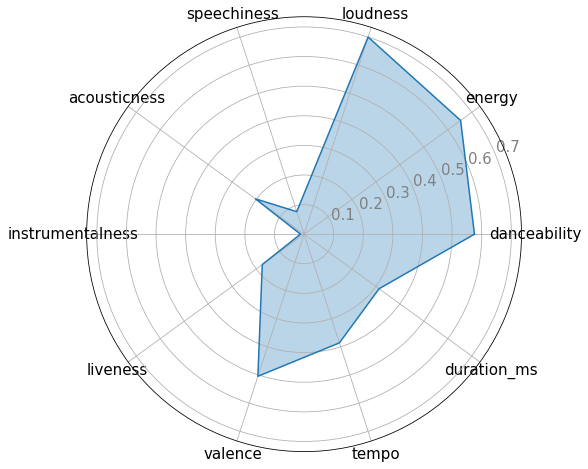

In [35]:
import matplotlib.pyplot as plt
import math
# plot size
fig=plt.figure(figsize=(12,8))

# convert column names into a list
categories=list(pop_features.columns)
# number of categories
N=len(categories)

# create a list with the average of all features
value=list(pop_features.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
angles=[n/float(N)*2*math.pi for n in range(N)]
angles+=angles[:1]

# plot
plt.polar(angles, value)
plt.fill(angles,value,alpha=0.3)

# plt.title('Discovery Weekly Songs Audio Features', size=35)

plt.xticks(angles[:-1],categories, size=15)
plt.yticks(color='grey',size=15)
plt.show()

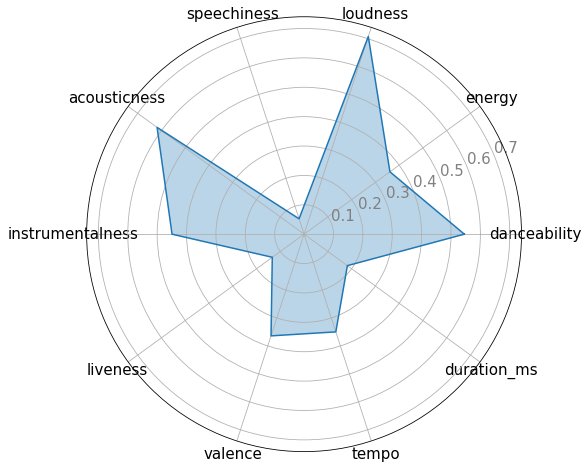

In [36]:
# plot size
fig=plt.figure(figsize=(12,8))

# convert column names into a list
categories=list(jazz_features.columns)
# number of categories
N=len(categories)

# create a list with the average of all features
value=list(jazz_features.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
angles=[n/float(N)*2*math.pi for n in range(N)]
angles+=angles[:1]

# plot
plt.polar(angles, value)
plt.fill(angles,value,alpha=0.3)

# plt.title('Discovery Weekly Songs Audio Features', size=35)

plt.xticks(angles[:-1],categories, size=15)
plt.yticks(color='grey',size=15)
plt.show()

In [ ]:
#Bar Chart
print(final_df.pivot(index='Video_Title', columns='Genre', values=''))

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

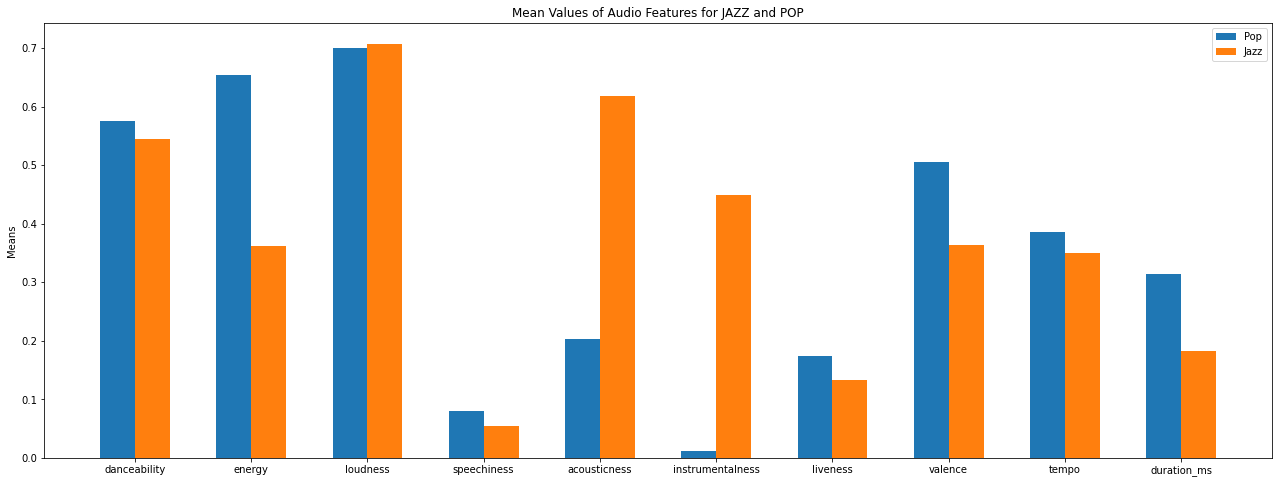

In [48]:
import numpy as np


labels = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
                           'liveness', 'valence', 'tempo', 'duration_ms']
pop_means = [pop_features['danceability'].mean(), pop_features['energy'].mean(), pop_features['loudness'].mean(),
            pop_features['speechiness'].mean(), pop_features['acousticness'].mean(), pop_features['instrumentalness'].mean(),
            pop_features['liveness'].mean(), pop_features['valence'].mean(), pop_features['tempo'].mean(),
            pop_features['duration_ms'].mean()]
jazz_means = [jazz_features['danceability'].mean(), jazz_features['energy'].mean(), jazz_features['loudness'].mean(),
            jazz_features['speechiness'].mean(), jazz_features['acousticness'].mean(), jazz_features['instrumentalness'].mean(),
            jazz_features['liveness'].mean(), jazz_features['valence'].mean(), jazz_features['tempo'].mean(),
            jazz_features['duration_ms'].mean()]

x = np.arange(len(labels))  # the label locations
# plot size
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(22, 8))
rects1 = ax.bar(x - width/2, pop_means, width, label='Pop')
rects2 = ax.bar(x + width/2, jazz_means, width, label='Jazz')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Means')
ax.set_title('Mean Values of Audio Features for JAZZ and POP')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)


plt.show()